In [1]:
# ------------    Load Dataset & Libraries    ------------
# Import the following packages needed to perform the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

# plot shown in Jupyter Notebook
%matplotlib inline  
# expand the figure-width
plt.rcParams['figure.figsize'] = 8, 4


# Loading Dataset
# Import the csv dataset
movies = pd.read_csv("./MovieRatings.csv")     # load datset

# -=-=-  Explore the data  -=-=-
# Visualize the dataframe
movies

# rename the column names to single-string names
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head()    # view dataset


,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [2]:
# ----   convert 'numerical-type',' object-type' to "categorical-type"   ----
movies.Film = movies.Film.astype("category") # use assignment '=' to update the dataset
movies.Genre = movies.Genre.astype("category")   
movies.Year = movies.Year.astype("category")  

In [11]:
movies.info()   # check the data-type changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


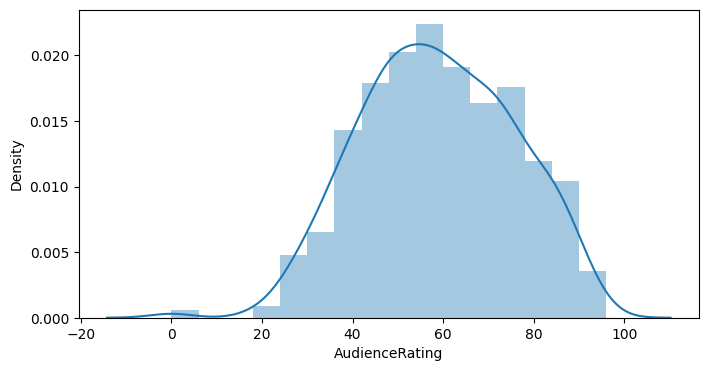

In [3]:
# ------------    HISTOGRAMS    ------------
# We've already used the method to plot 'histogram'
# 'distplot' is used to visualize 'Ditribution in histogram'
# It has been replaced by 'histplot' and 'displot', two functions with a modern API and many more capabilities.
hist_1 = sns.distplot(movies.AudienceRating)

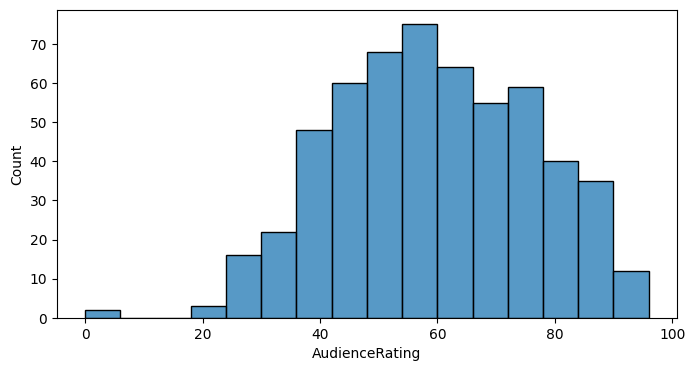

In [4]:

# using 'histplot'
hist_2 = sns.histplot(movies.AudienceRating)

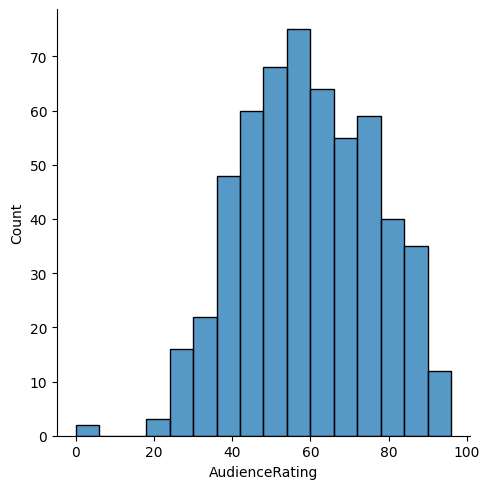

In [5]:
# using 'displot'
hist_2 = sns.displot(movies.AudienceRating)

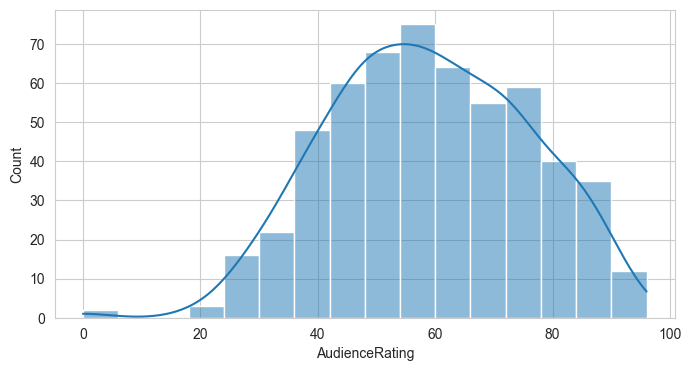

In [19]:
# using 'histplot'
sns.set_style('whitegrid')  # shows grid
hist_2 = sns.histplot(data=movies.AudienceRating, kde=True)
# or use with grid()
# hist_2 = sns.histplot(data=movies.AudienceRating, kde=True).grid()
# 'kde=True' shows the continuous line plot of the distribution
# plt.grid()

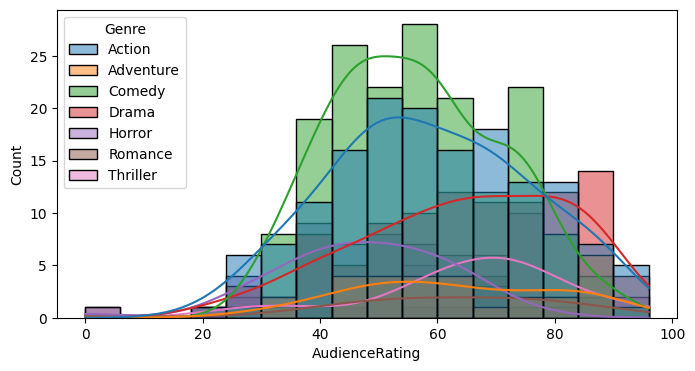

In [15]:
# with categorical data
    # To categorize on 'Genre', use: hue="Genre"
hist_4 = sns.histplot(data=movies, x='AudienceRating', hue='Genre', kde=True) 

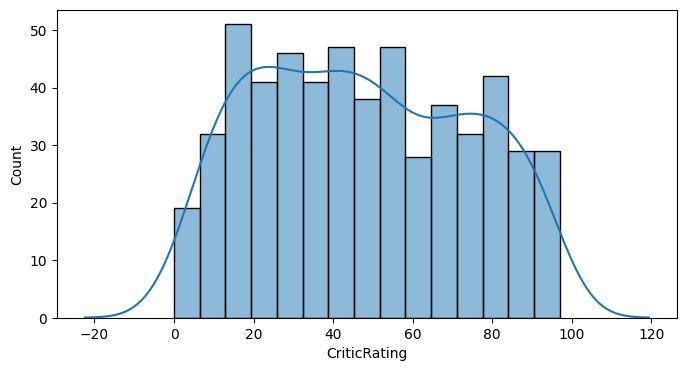

In [6]:
# CriticRating
hist_5 = sns.histplot(data=movies, x='CriticRating', kde=True, bins=15, kde_kws=dict(cut=3))
# without 'cut' only actual range of the data shown
    # 'cut=3' used to get 'full curve'

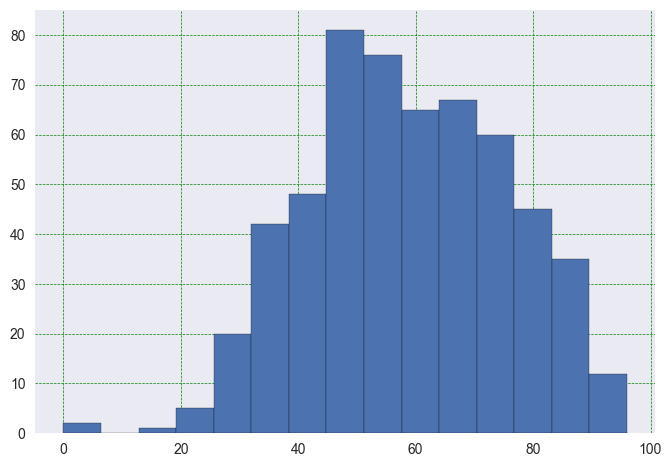

In [22]:
# ----    Another way to plot "Distribution" using pyplot 'plt'    ----
# Since seaborn is built on top of 'matplotlib.pyplot', we can directly use 'pyplot'
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5,)
plt.style.use("seaborn")    # background color
hist_5 = plt.hist(movies.AudienceRating, bins=15, edgecolor='black', linewidth=.2)
# edgecolor='black', linewidth=.2 used to show 'bars edege'

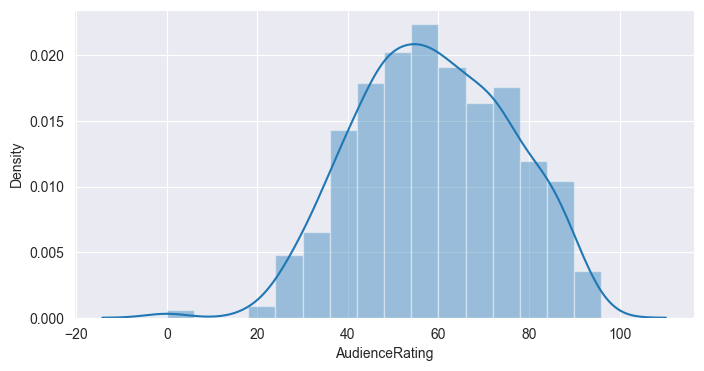

In [4]:
# To reset all styles of seaborn use: 
# sns.set_style("white")

# To get a seaborn style use:
sns.set_style("darkgrid")
hist_6 = sns.distplot(movies.AudienceRating)

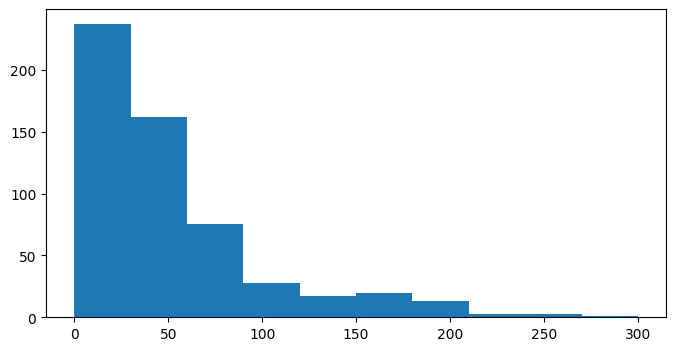

In [5]:
# -=-=-=-    using 'pyplot'    -=-=-=-
# Our approach will be more related on 'Programming' rather than data-science
# Histogram of 'BudgetMillions'
hst_1 = plt.hist(movies.BudgetMillions)
plt.show()  # shows plot without any info

In [11]:
is_drama = (movies.Genre == 'Drama')   # Budget on certain 'Genre'
is_drama

0      False
1      False
2      False
3      False
4      False
       ...  
554    False
555    False
556    False
557    False
558    False
Name: Genre, Length: 559, dtype: bool

In [13]:
# Now we create new data-frame for 'Drama-movies' only
drama_movies = movies[is_drama]
drama_movies

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
10,88 Minutes,Drama,5,51,30,2007
11,A Dangerous Method,Drama,79,89,20,2011
13,A Serious Man,Drama,89,64,7,2009
18,Albert Nobbs,Drama,53,43,8,2011
23,All Good Things,Drama,33,64,20,2010
...,...,...,...,...,...,...
529,War Horse,Drama,77,73,66,2011
532,Water For Elephants,Drama,60,72,38,2011
534,We Own the Night,Drama,55,63,21,2007
541,Whip It,Drama,84,73,15,2009


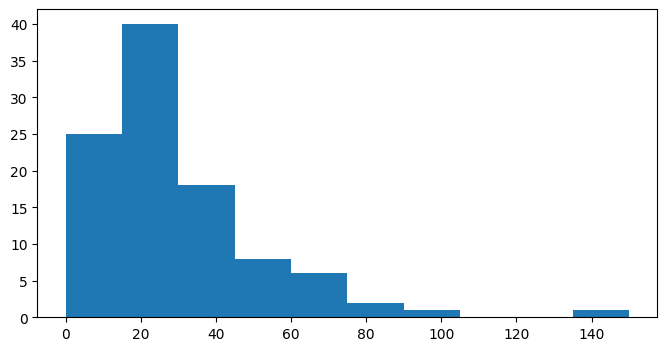

In [14]:
# Visualize Drama-movies 'BudgetMillions'
hst_2 = plt.hist(drama_movies.BudgetMillions)
plt.show()

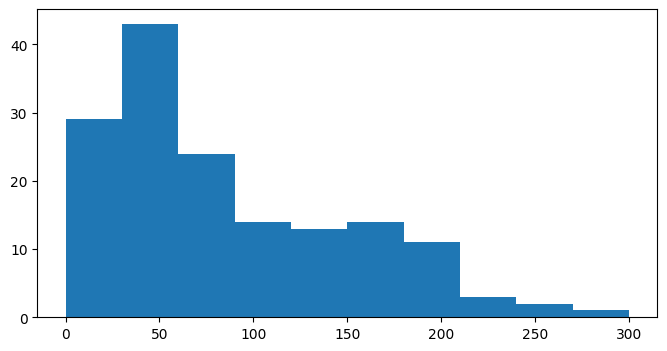

In [15]:
hst_3 = plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)   # Action-movies Budget

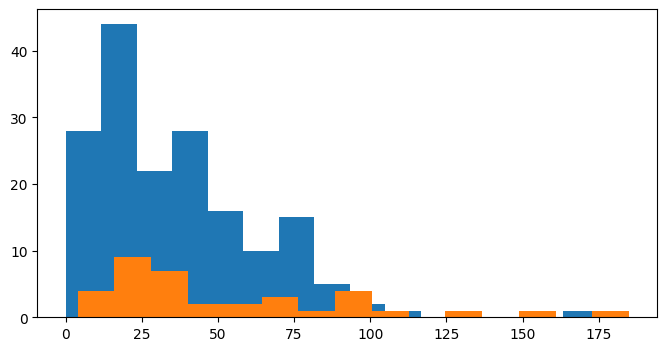

In [18]:
hst_4 = plt.hist(movies[movies.Genre == 'Comedy'].BudgetMillions, bins=15)   # Comedy-movies Budget
hst_5 = plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)   # Thriller-movies Budget

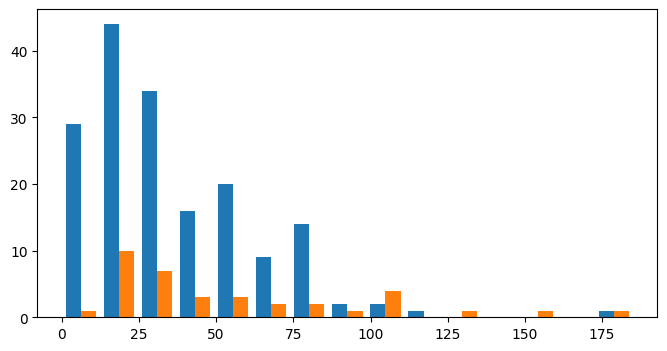

In [19]:
# 'Stacked Histogram'
    # To create a 'Stacked Histogram' we need to pass a list of data-frame in hist()
stckHst_1 = plt.hist([movies[movies.Genre == 'Comedy'].BudgetMillions, movies[movies.Genre == 'Thriller'].BudgetMillions], bins=15)

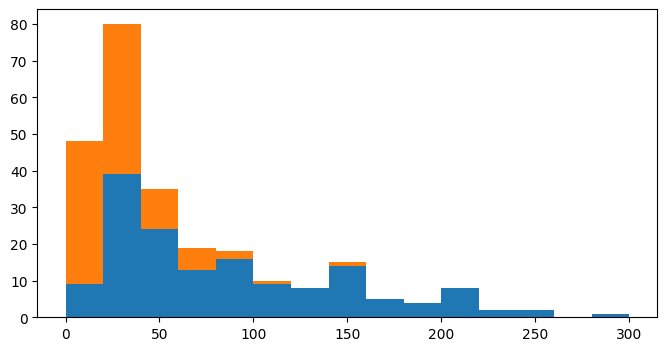

In [4]:
bdgt_ls1 = [movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions]
stckHst_2 = plt.hist(bdgt_ls1, bins=15, stacked=True)

In [8]:
all_genre = movies.Genre.cat.categories
all_genre = list(all_genre)

In [13]:
bdgt_ls2 = []
for gnr in all_genre:
    bdgt_ls2.append(movies[movies.Genre == gnr].BudgetMillions)
bdgt_ls2

[2       20
 5      200
 15      35
 29      20
 30      20
       ... 
 531    130
 542     35
 546    150
 547    160
 557     24
 Name: BudgetMillions, Length: 154, dtype: int64,
 1      105
 3       18
 19     200
 21      45
 24      40
 32      78
 46      20
 65      38
 68     140
 130     73
 165     12
 166    125
 167    250
 168    150
 176     36
 178    150
 192     70
 193     60
 241     60
 272     37
 341     19
 363     70
 386    130
 401    155
 459     59
 463     25
 506     38
 540    100
 548     60
 Name: BudgetMillions, dtype: int64,
 0       8
 4      20
 6      30
 8      28
 9       8
        ..
 552    80
 553    22
 554    50
 555    18
 558    80
 Name: BudgetMillions, Length: 172, dtype: int64,
 10     30
 11     20
 13      7
 18      8
 23     20
        ..
 529    66
 532    38
 534    21
 541    15
 545     2
 Name: BudgetMillions, Length: 101, dtype: int64,
 7      32
 12     35
 20     40
 28      5
 59     26
 88     10
 97     25
 100    30
 10

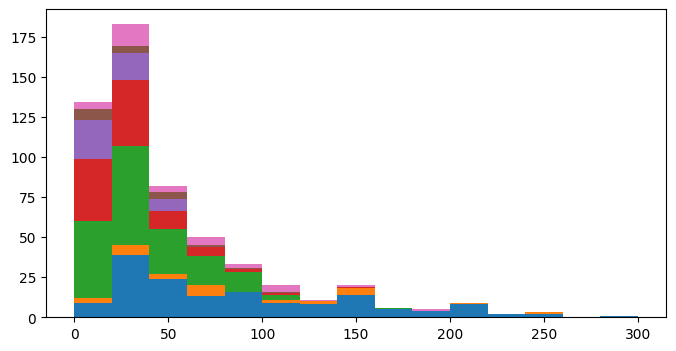

In [15]:
# visualize
stckHst_3 = plt.hist(bdgt_ls2, bins=15, stacked=True)

(array([[29., 43., 24., 14., 13., 14., 11.,  3.,  2.,  1.],
        [ 5.,  7.,  7.,  2.,  3.,  3.,  1.,  0.,  1.,  0.],
        [84., 54., 28.,  5.,  0.,  1.,  0.,  0.,  0.,  0.],
        [65., 26.,  8.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
        [33., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 8.,  7.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [13.,  9.,  6.,  5.,  1.,  1.,  1.,  0.,  0.,  0.]]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 7 BarContainer objects>)

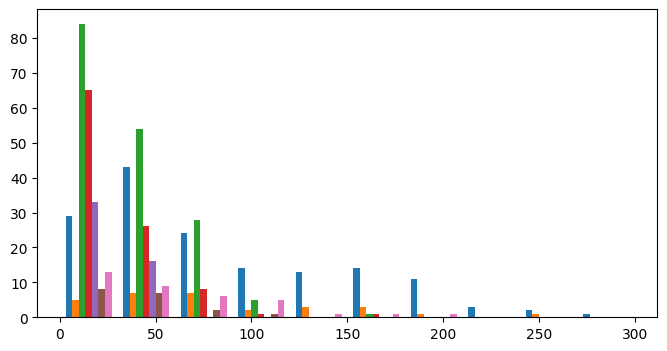

In [17]:
plt.hist(bdgt_ls2)

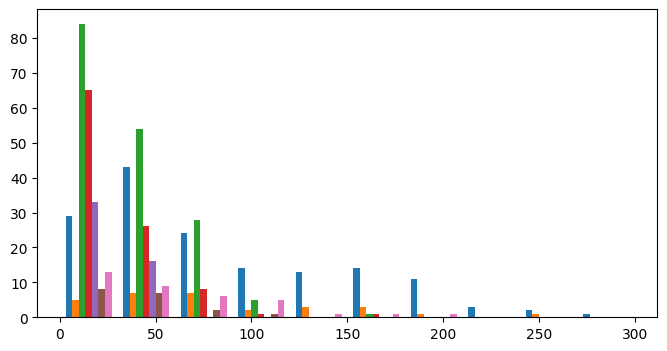

In [4]:
# also we can use following code
list_1 = list()
for gen in movies.Genre.cat.categories:
    list_1.append(movies[movies.Genre == gen].BudgetMillions)
hs_1 = plt.hist(list_1)

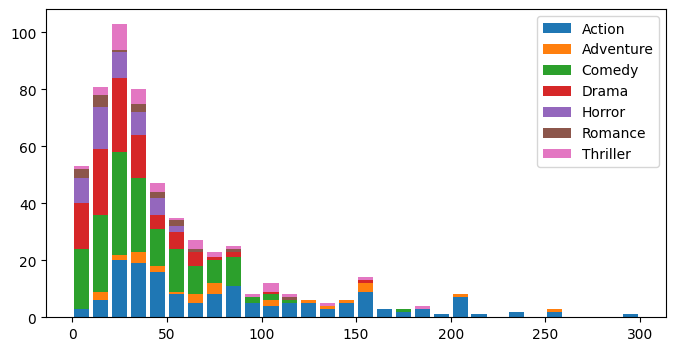

In [5]:
# stacked 
    # remove gap between the bars (side): rwidth=1
    # Legends: use 'label=list_of_strings' attribute
all_genre = list(movies.Genre.cat.categories)
hs_3 = plt.hist(list_1, bins=30, stacked=True, rwidth=.8, label=all_genre)
plt.legend()
plt.show()

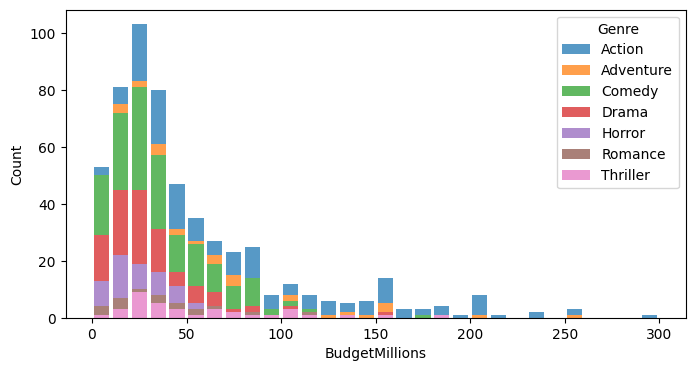

In [16]:
# -=-=-=-    using 'seaborn'    -=-=-=-
# 'seaborn' as sns. We do this in one line of code
hist_sns_1 = sns.histplot(data=movies, x='BudgetMillions', hue='Genre', multiple="stack", shrink=.8, linewidth=0, bins=30) 